In [1]:
import numpy as np

# Load the data
X = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\landmarks_data.npy', allow_pickle=True)
y = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\labels_data.npy', allow_pickle=True)

print(f"Loaded X shape: {X.shape}")
print(f"Loaded y shape: {y.shape}")

if y.ndim == 2 and y.shape[1] == 1:
    y = y.reshape(-1)

print(f"Loaded X shape: {X.shape}")
print(f"Loaded y shape: {y.shape}")

# Filter labels to keep
labels_to_keep = [0, 1, 4, 7, 9]
mask = np.isin(y, labels_to_keep)
X_filtered = X[mask]
y_filtered = y[mask]

print(f"Filtered X shape: {X_filtered.shape}")
print(f"Filtered y shape: {y_filtered.shape}")
print(f"Unique labels in filtered data: {np.unique(y_filtered)}")

# Map labels to sequential integers
label_mapping = {original_label: new_label for new_label, original_label in enumerate(labels_to_keep)}
y_mapped = np.array([label_mapping[label] for label in y_filtered], dtype=np.int64)
print(f"Mapped labels: {np.unique(y_mapped)}")

Loaded X shape: (761, 300, 132)
Loaded y shape: (761, 1)
Loaded X shape: (761, 300, 132)
Loaded y shape: (761,)
Filtered X shape: (227, 300, 132)
Filtered y shape: (227,)
Unique labels in filtered data: [0 1 4 7 9]
Mapped labels: [0 1 2 3 4]


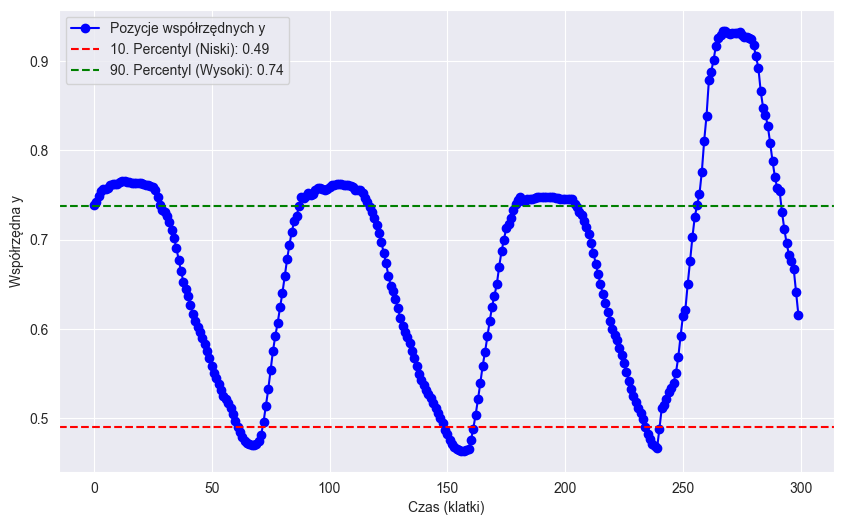

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\landmarks_data.npy', allow_pickle=True)
y = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\labels_data.npy', allow_pickle=True)

# Select a sample from the dataset (e.g., index 0)
sample_index = 326
selected_landmark_index = 24  # Example: Left Hip (change index as needed for your plot)
selected_exercise = "squat"  # Define the exercise type

# Extract y-coordinates for the selected landmark
y_positions = X[sample_index, :, selected_landmark_index * 3 + 1]  # y-coordinates for the landmark

# Calculate thresholds
low_percentile = np.percentile(y_positions, 10)
high_percentile = np.percentile(y_positions, 60)

# Prepare the plot
plt.figure(figsize=(10, 6))
plt.plot(y_positions, label="Pozycje współrzędnych y", marker='o', color='blue')
plt.axhline(y=low_percentile, color='red', linestyle='--', label=f'10. Percentyl (Niski): {low_percentile:.2f}')
plt.axhline(y=high_percentile, color='green', linestyle='--', label=f'90. Percentyl (Wysoki): {high_percentile:.2f}')

# Add labels and title
plt.xlabel('Czas (klatki)')
plt.ylabel('Współrzędna y')
plt.legend()
plt.grid(True)
plt.show()


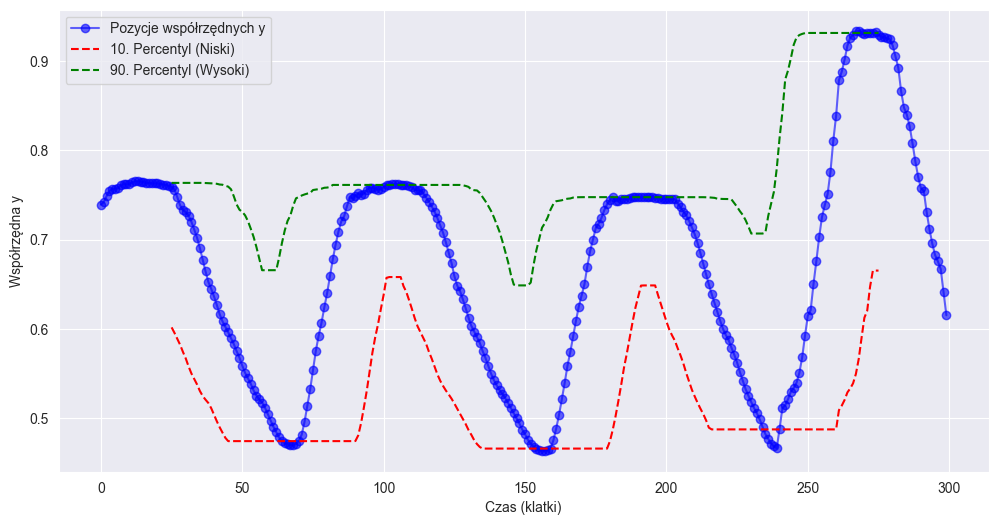

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
X = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\landmarks_data.npy', allow_pickle=True)
y = np.load(r'C:\Users\barrt\PycharmProjects\Gymalyze\src\data\labels_data.npy', allow_pickle=True)

# Choose a random sample index
sample_index = 326

# Define the landmark and exercise
selected_landmark_index = 24  # Example: Left Hip (adjust index as needed)
selected_exercise = "squat"  # Define the exercise type

# Extract y-coordinates for the selected landmark
y_positions = X[sample_index, :, selected_landmark_index * 3 + 1]  # y-coordinates for the landmark

# Define the window size
window_size = 50
low_percentiles = []
high_percentiles = []
frames = []

# Slide the window across the data
for start in range(len(y_positions) - window_size + 1):
    end = start + window_size
    window = y_positions[start:end]
    low_percentiles.append(np.percentile(window, 10))
    high_percentiles.append(np.percentile(window, 90))
    frames.append(start + window_size // 2)  # Center of the window

# Prepare the plot
plt.figure(figsize=(12, 6))
plt.plot(y_positions, label="Pozycje współrzędnych y", marker='o', color='blue', alpha=0.6)
plt.plot(frames, low_percentiles, color='red', linestyle='--', label='10. Percentyl (Niski)')
plt.plot(frames, high_percentiles, color='green', linestyle='--', label='90. Percentyl (Wysoki)')

# Add labels and title
plt.xlabel('Czas (klatki)')
plt.ylabel('Współrzędna y')
plt.legend()
plt.grid(True)
plt.show()
